## Machine Learning Course - Group Assignment - Black Friday Sales Prediction

### Group 16

* Nakul Ghate 
* Nima Sajedi
* Jana Taha
* Faider Florez Valencia
* Juraj Polakovic



### Objectives and goals:
* Build ML models which will help store to predict the amount of purchase based on customer purchase trends for different products.


## Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset

* The dataset we are going to use is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features that can be downloaded <a href="https://www.kaggle.com/sdolezel/black-friday">here</a>.

* Problem: Supervised Regression type.

#### Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

In [6]:
# Datasets Imports
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step 1: Data - Descriptive analysis

In [7]:
# Training dataset check
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
# Testing dataset check
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
# Training dataset shape
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [11]:
# Testing dataset shape
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [12]:
# Features data-type check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [13]:
# Null values check
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [14]:
# Statistics check
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [11]:
# Stay_In_Current_City_Years feature - Unique values counts check
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [16]:
# AGE feature - Unique values counts check
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

### Checkpoint
* 'Age' and 'Stay_In_Current_City_Years' contain some values which will need to be taken care of (+ signs) 
* 'Product_Category_2' contains 31.57% null values which can imputed  
* 'Product_Category_3' contains 69.67% null values so we can drop this feature.


## Data - Exploratory  Analysis

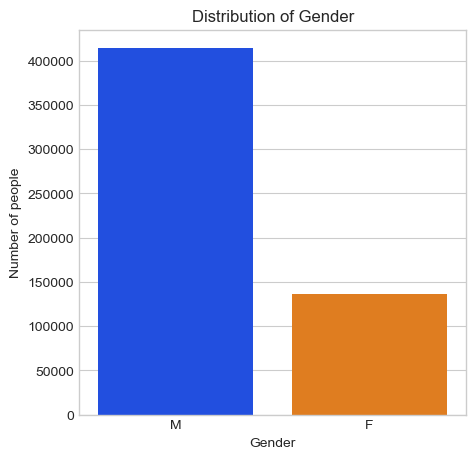

In [59]:
# Gender barplot
gen = train['Gender'].value_counts()

plt.figure(figsize = (5, 5))
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.tick_params(labelsize = 10)
plt.show()

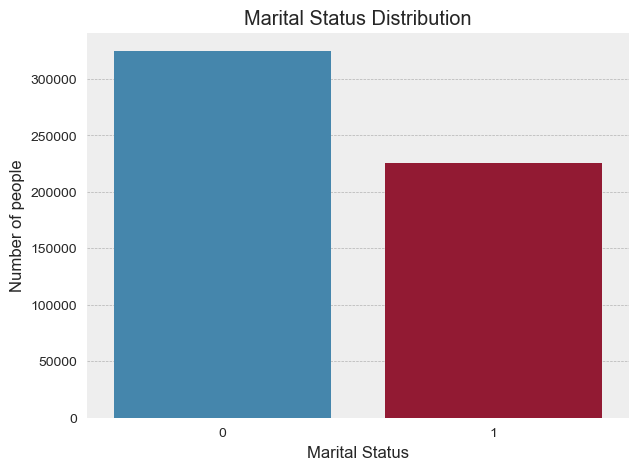

In [70]:
# 'Marital Status' countplot
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize = 10)
plt.show()

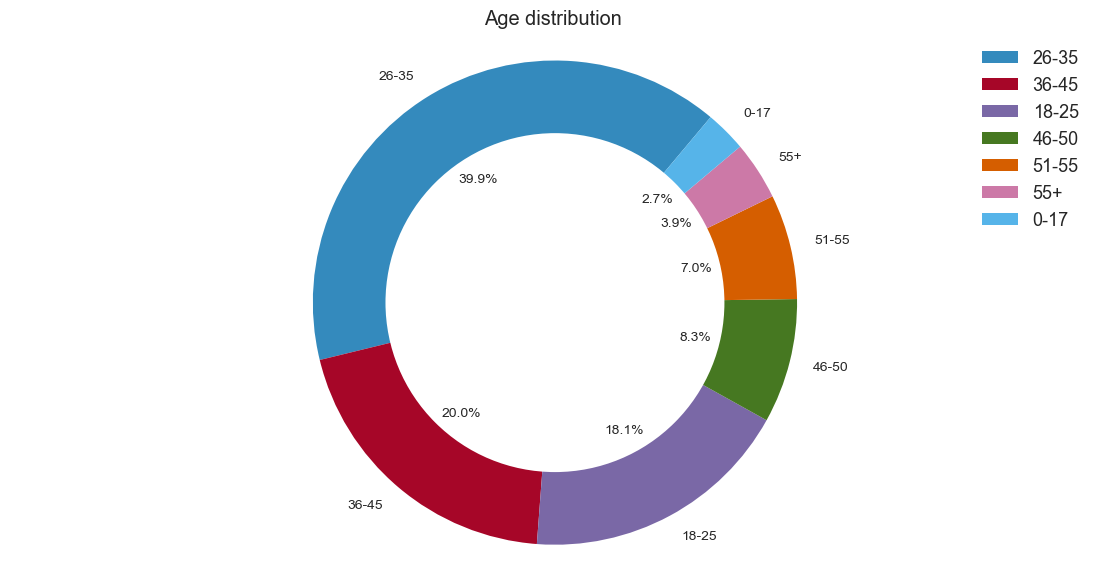

In [73]:
# 'Age' chart
age = train['Age'].value_counts()
plt.figure(figsize = (14, 7))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution')
plt.axis('equal')
plt.legend(prop = {'size' : 13})
plt.show()

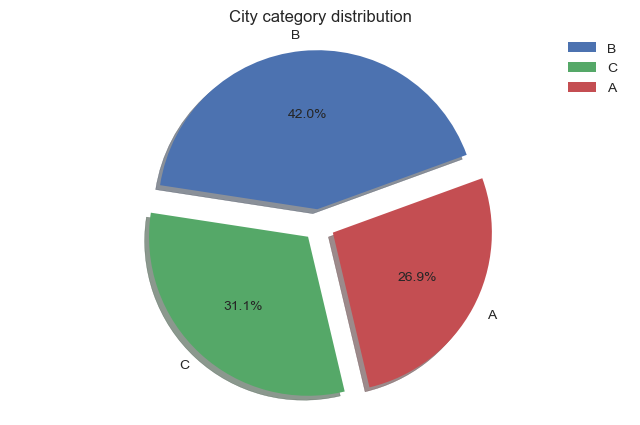

In [85]:
# 'City Category' pie chart
city = train['City_Category'].value_counts()
plt.figure(figsize = (8, 5))
plt.pie(city.values, labels = city.index, startangle = 20, explode = (0.1 , 0.1, 0.1), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution')
plt.legend()
plt.legend(prop = {'size' : 10})
plt.axis('equal')
plt.show()

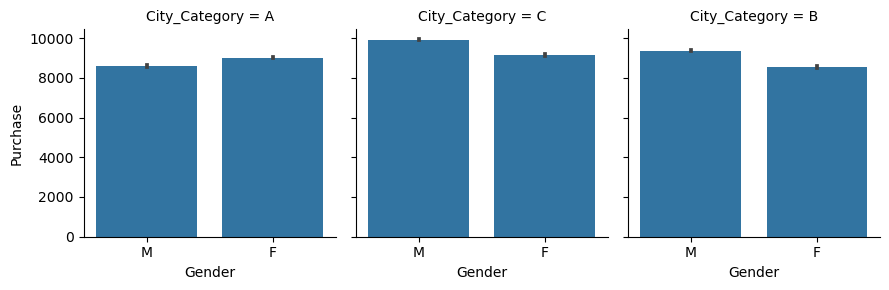

In [136]:
# Impact of purchase on City_Category (per gender)
city = sns.FacetGrid(train,col="City_Category")
city.map(sns.barplot, "Gender", "Purchase")

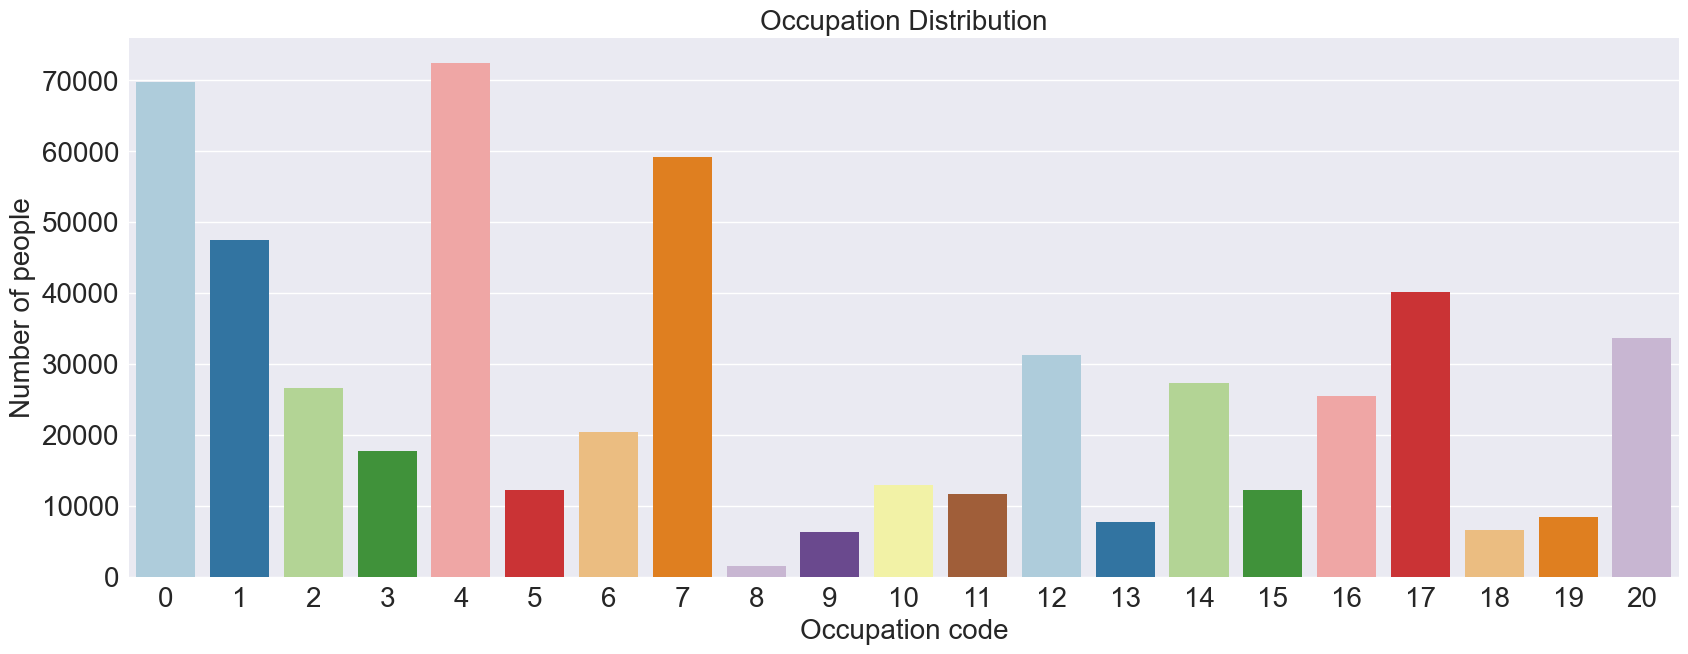

In [96]:
# 'Occupation char
occupation = train['Occupation'].value_counts()
plt.figure(figsize = (20, 7))
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation Distribution', fontsize=20)
plt.xlabel('Occupation code', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.tick_params(labelsize = 20)
plt.show()

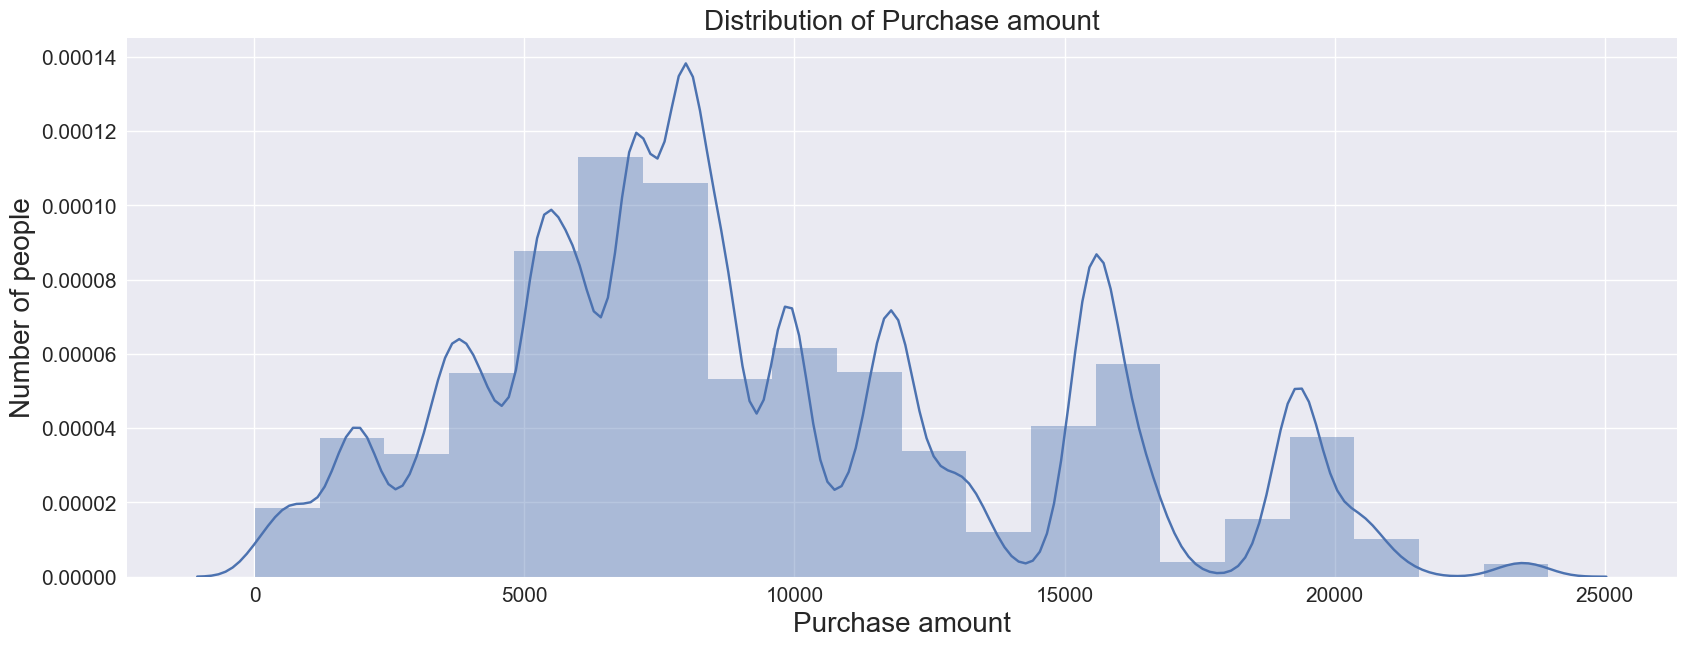

In [95]:
# 'Purchase' distplot
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontsize=20)
plt.xlabel('Purchase amount', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.tick_params(labelsize = 15)
plt.show()

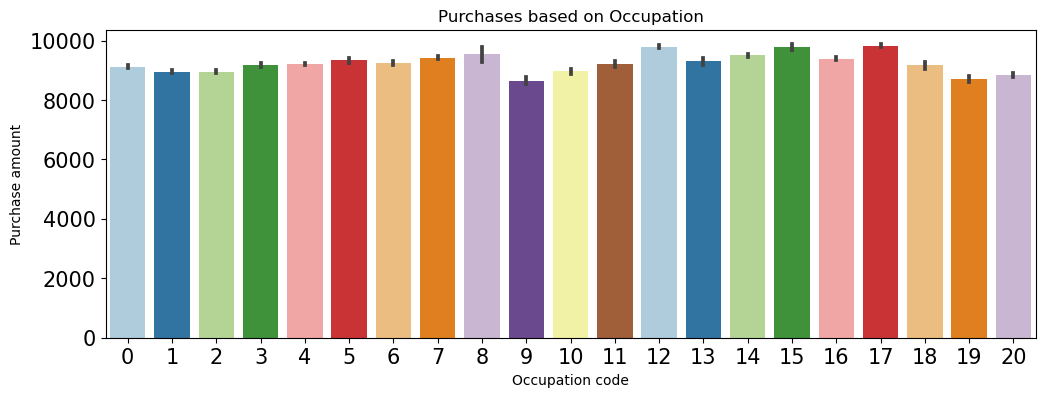

In [105]:
# Purchase based on Occupation
plt.figure(figsize = (12, 4))

sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchases based on Occupation')
plt.xlabel('Occupation code', )
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 15)
plt.show()

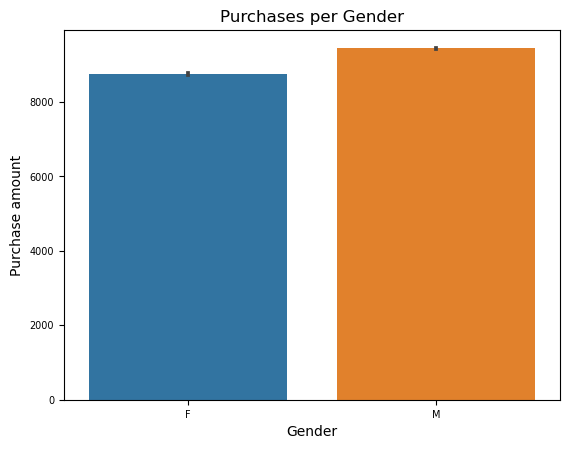

In [106]:
# 'Purchases per Gender barplot
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchases per Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 7)
plt.show()

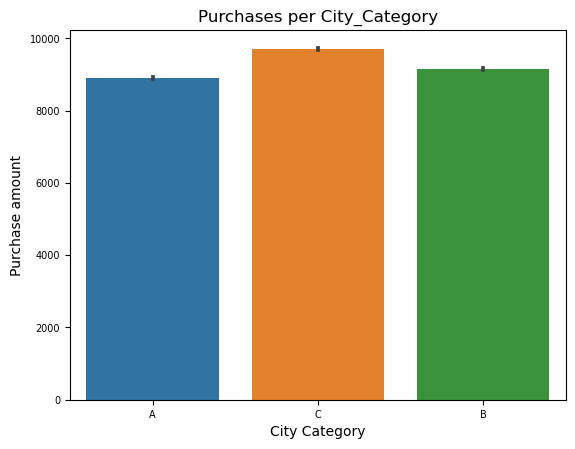

In [108]:
# Purchases per City_Category
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchases per City_Category')
plt.xlabel('City Category')
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 7)
plt.show()

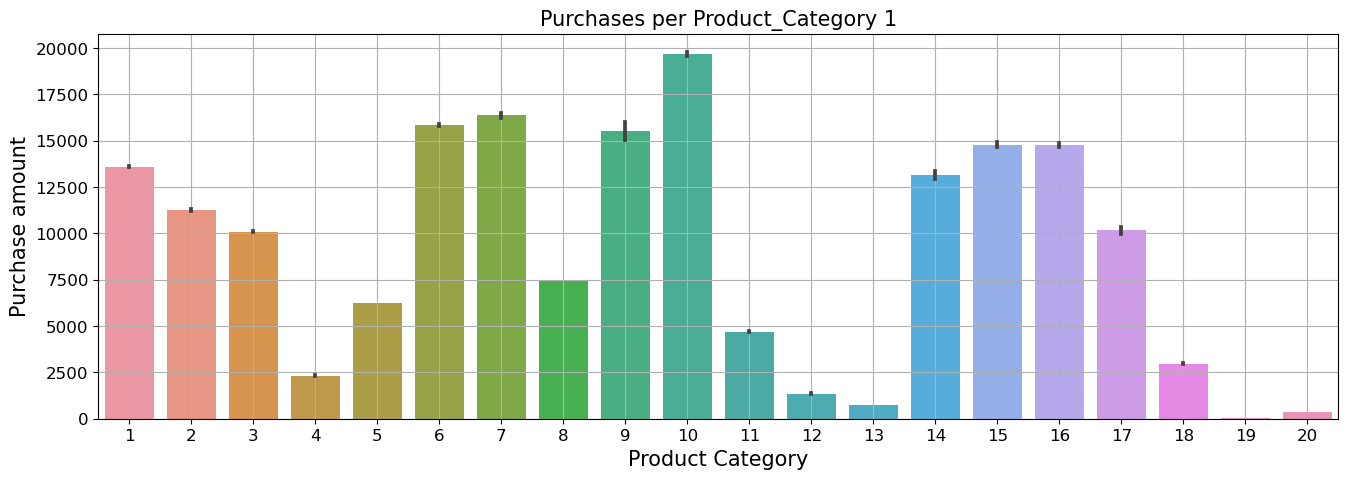

In [137]:
# Barplot of Purchases per Product_Category_1
plt.figure(figsize = (16, 5))
sns.barplot(train['Product_Category_1'], train['Purchase'])
plt.title('Purchases per Product_Category 1', fontsize=15)
plt.xlabel('Product Category', fontsize=15)
plt.ylabel('Purchase amount', fontsize=15)
plt.tick_params(labelsize = 12)
plt.grid()
plt.show()

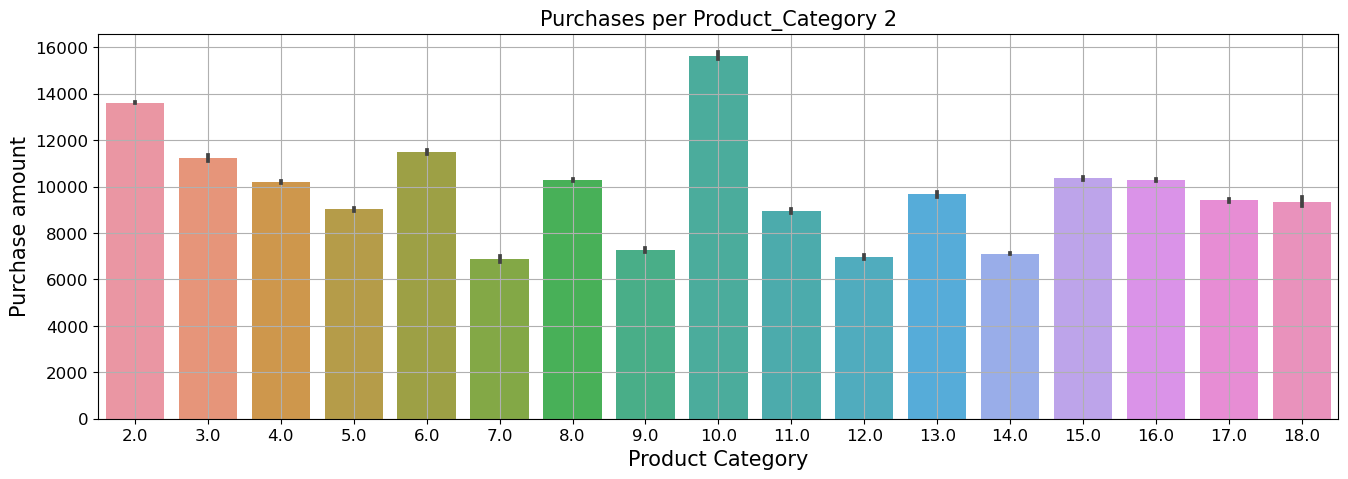

In [138]:
# Barplot of Purchases per Product_Category_1
plt.figure(figsize = (16, 5))
sns.barplot(train['Product_Category_2'], train['Purchase'])
plt.title('Purchases per Product_Category 2', fontsize=15)
plt.xlabel('Product Category', fontsize=15)
plt.ylabel('Purchase amount', fontsize=15)
plt.tick_params(labelsize = 12)
plt.grid()
plt.show()

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

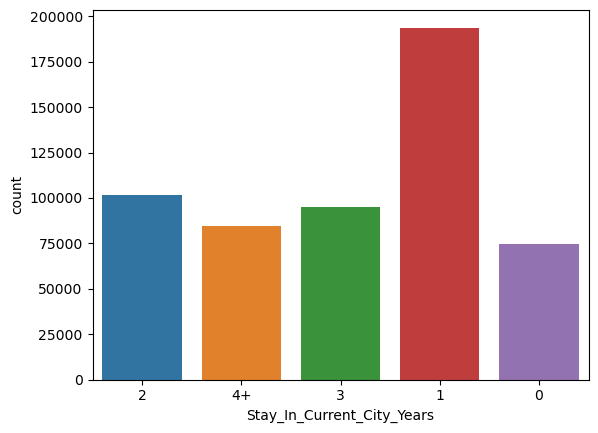

In [141]:
# Stay_In_Current_City_Years Treemap
sns.countplot(train['Stay_In_Current_City_Years'])

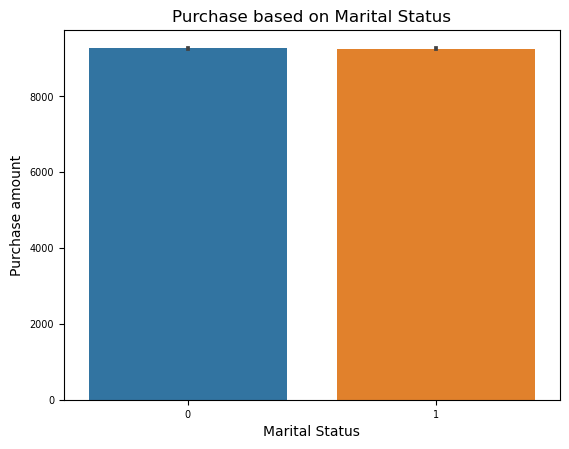

In [120]:
# Purchase based on Marital Status barplot
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 7)
plt.show()

<Figure size 1600x1600 with 0 Axes>

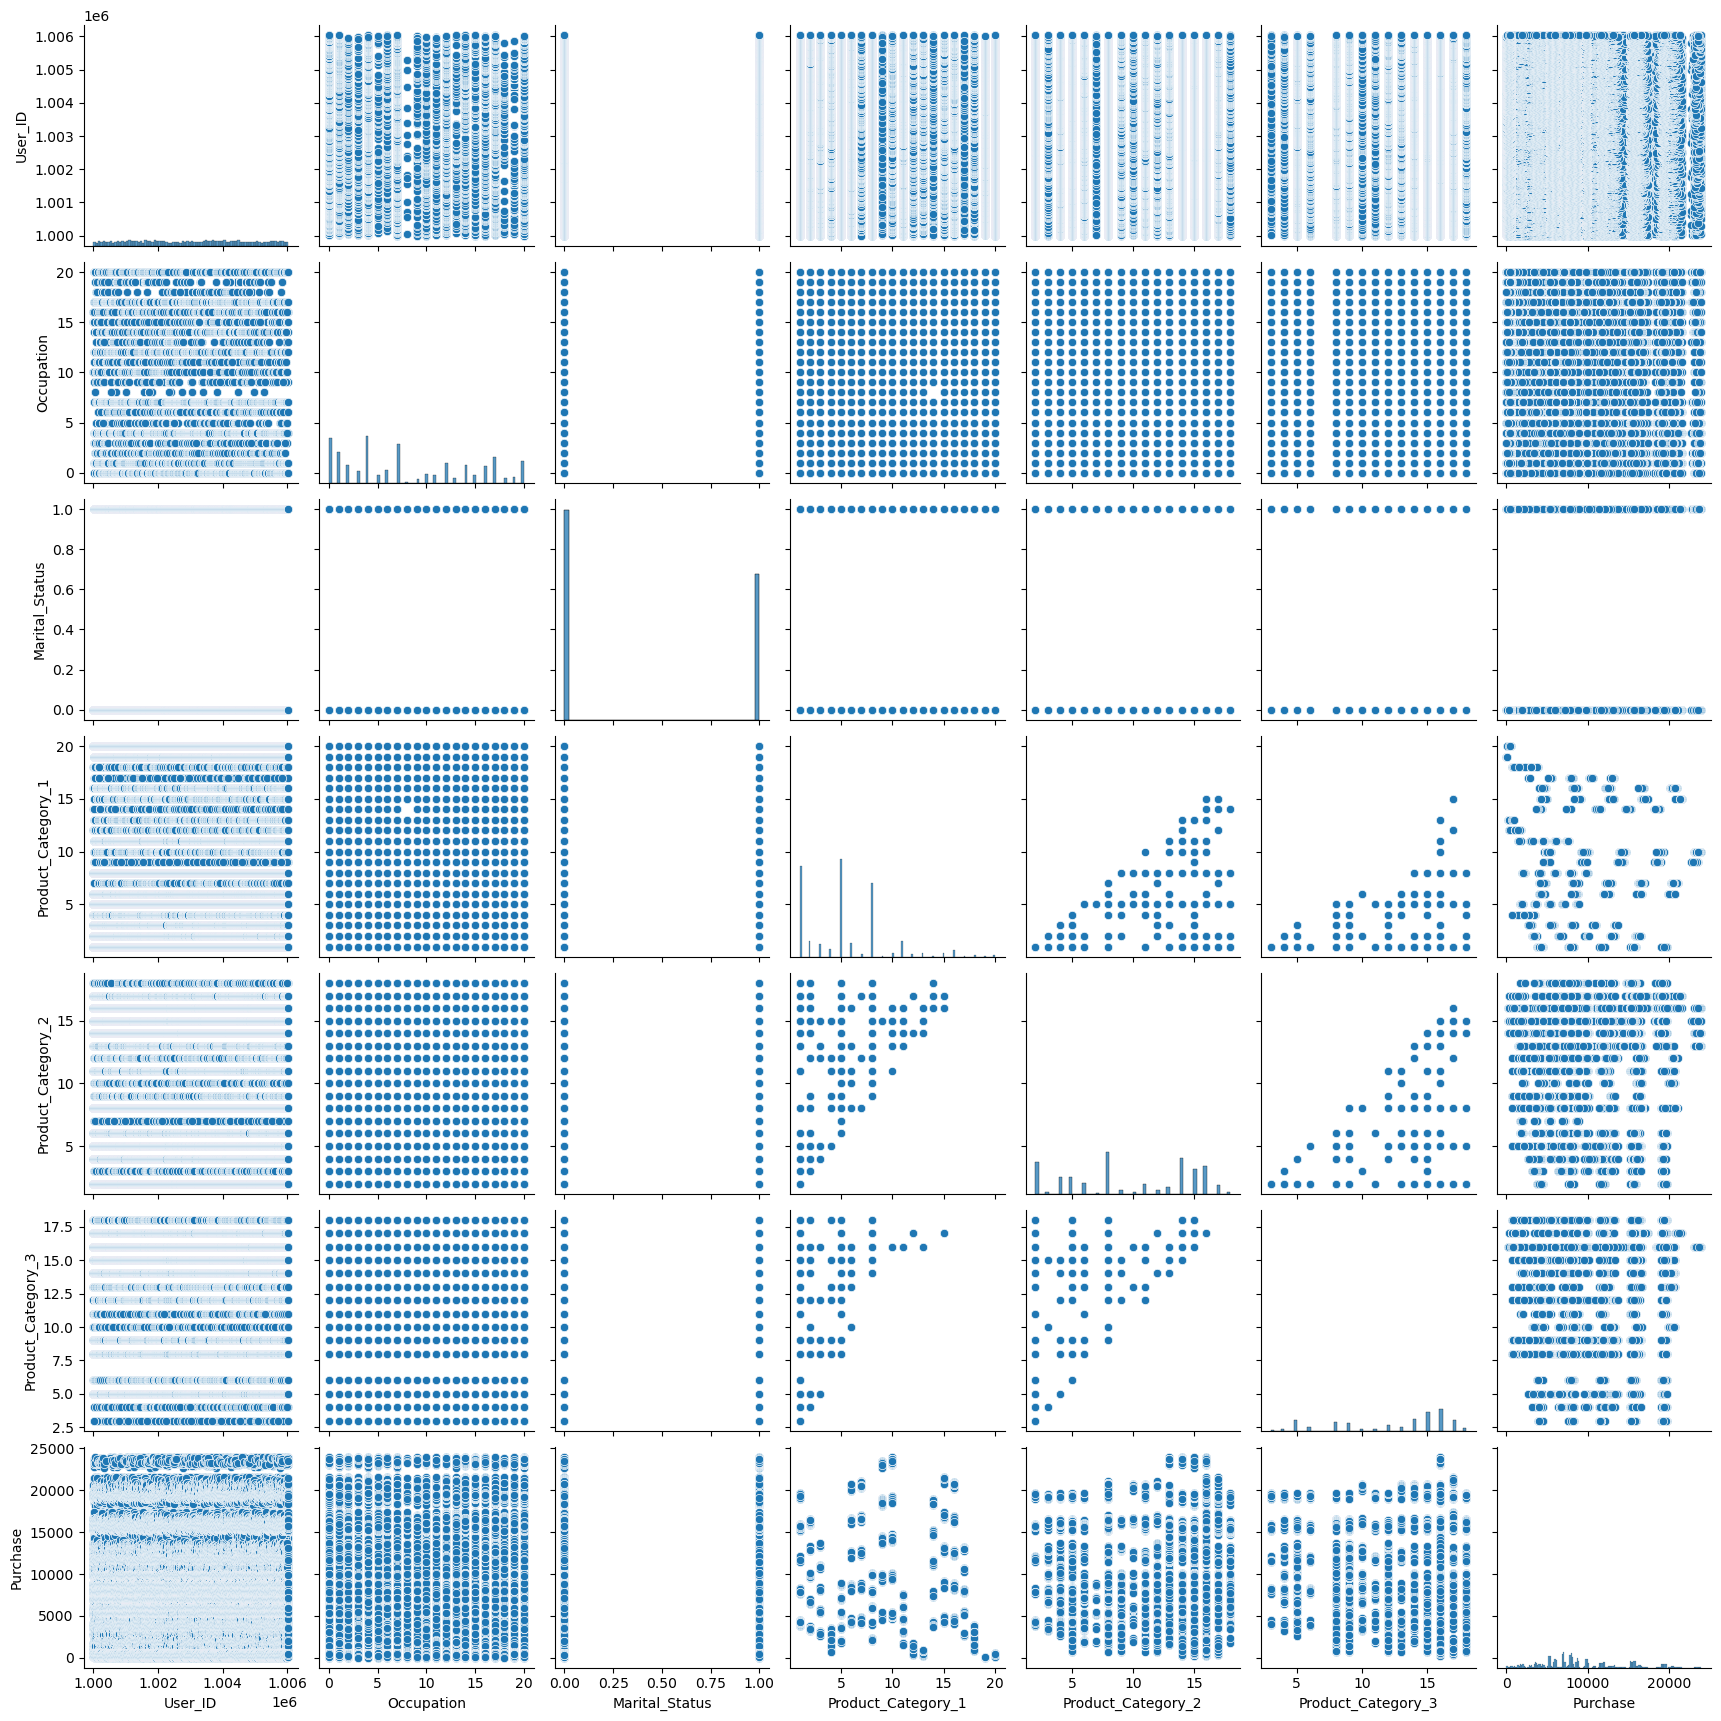

In [133]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

In [142]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


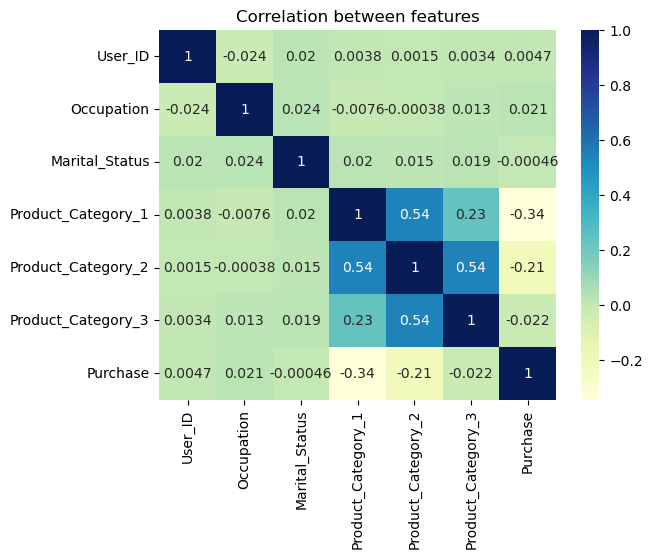

In [143]:
# Correlation matrix heatmap
# Checking on correlation between the independent variables and depedent variables
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu").set_title("Correlation between features") 
plt.show()

#### CHECKPOINT / OBSERVATIONS
* From the gender distribution plot we can see thatnumber of women was less than the number of men who shopped during Black Friday.
* From the correlation heatmap, we can observe following dependences: 
    * feature 'Purchase' is highly correlated with 'Product_Category_1' 
    * feature 'Purchase' is highly correlated with 'Product_Category_2'
  
  

## Data preprocessing

In [152]:
train['source'] = 'train'
test['source'] = 'test'

In [153]:
# train and test merge
merged_dataset = pd.concat([train, test])

In [175]:
merged_dataset

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,0,0,10,0,2,0,3,9.0,8370.0,train
1,0,0,10,0,2,0,1,6.0,15200.0,train
2,0,0,10,0,2,0,12,9.0,1422.0,train
3,0,0,10,0,2,0,12,14.0,1057.0,train
4,1,6,16,2,4,0,8,9.0,7969.0,train
...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,9.0,NaN,test
233595,0,2,15,1,4,1,5,8.0,NaN,test
233596,0,2,15,1,4,1,1,5.0,NaN,test
233597,0,4,1,2,4,0,10,16.0,NaN,test


In [154]:
# Dropping features we do not need
merged_dataset.drop('User_ID', axis = 1, inplace = True)
merged_dataset.drop('Product_Category_3', axis = 1, inplace = True)
merged_dataset.drop('Product_ID', axis = 1, inplace = True)

In [159]:
# Necessary cleanup in 'Age' and 'Stay_In_Current_City_Years' columns where we need to replace '+' signs
merged_dataset['Age'] = merged_dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))
merged_dataset['Stay_In_Current_City_Years'] = merged_dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [160]:
# Necessary Fix of null values in 'Product_Category_2'
merged_dataset['Product_Category_2'].fillna(merged_dataset['Product_Category_2'].median(), inplace = True)

In [161]:
# Changing Stay_In_Current_City_Years' to integer(numeric data type)
merged_dataset['Stay_In_Current_City_Years'] = merged_dataset['Stay_In_Current_City_Years'].astype('int')

In [176]:
merged_dataset['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int32

In [162]:
## Feature Encoding

from sklearn.preprocessing import LabelEncoder
#Age
label_encoder_age = LabelEncoder()
merged_dataset['Age'] = label_encoder_age.fit_transform(merged_dataset['Age'])
#City_Category
label_encoder_city = LabelEncoder()
merged_dataset['City_Category'] = label_encoder_city.fit_transform(merged_dataset['City_Category'])
#Gender
label_encoder_gender = LabelEncoder()
merged_dataset['Gender'] = label_encoder_gender.fit_transform(merged_dataset['Gender'])


In [166]:
#merged_dataset['Age']

In [163]:
#splitting merged dataset nto train and test
train = merged_dataset.loc[merged_dataset['source'] == 'train']
test = merged_dataset.loc[merged_dataset['source'] == 'test']

train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [ ]:
#creating X and Y 
X = train.drop("Purchase", axis = 1)
Y = train["Purchase"]

##  Feature Selection

###  Feature Scaling

### train test split (80/20)

In [173]:
from sklearn.model_selection import train_test_split

## Data Modelling

##### we should do multiple models here Linear Regression, Random Forest Regressor, Decision Tree Regression maybe XGB Regressor too. 

## Model Evaluation

## Hyperparameter tuning ? 

In [174]:
#RandomizedSearchCV

## SUMMARY / Conclusion